<a href="https://colab.research.google.com/github/abhijain1216/Health-Insurance-Cross-Sell-Prediction-Classification-Project/blob/main/Health_Insurance_Cross_Sell_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Abhinav Jian

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
Insurance_df = pd.read_csv('/content/drive/MyDrive/Projects/Almabetter Classification Capstone Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
Insurance_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'Insurance Dataframe : rows = { Insurance_df.shape[0]} , columns = { Insurance_df.shape[1]}')

Insurance Dataframe : rows = 381109 , columns = 12


### Dataset Information

In [6]:
# Dataset Info
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f'Duplicate Values in Insurance Dataframe : {Insurance_df.duplicated().sum()}')

Duplicate Values in Insurance Dataframe : 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
Insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We don't have any null values or misssing values in Insurance dataframe.

<Axes: >

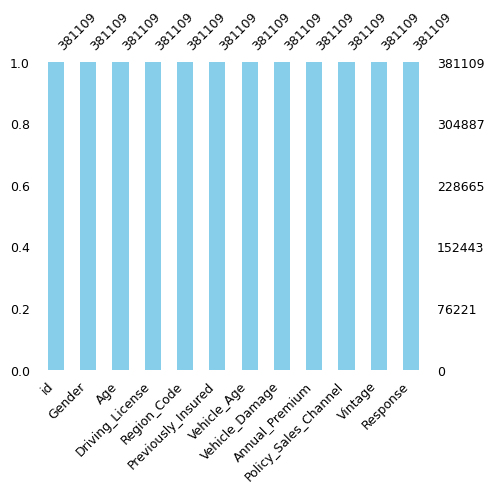

In [9]:
# Visualizing the missing values
msno.bar(Insurance_df,figsize=(5,4),color = 'skyblue',fontsize= 9)

### What did you know about your dataset?

* The dataset has information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.It has approximately 38,000 observations and 12 features.

* There are no null/missing values in the dataframe.

* There are no duplicate values in the dataframe, all rows are unique.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(f'Columns in Insurance Dataframe : {list(Insurance_df.columns)}')

Columns in Insurance Dataframe : ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [11]:
# Dataset Describe
Insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


### Variables Description

* **id :**	Unique ID for the customer

* **Gender	:** Gender of the customer

* **Age :**	Age of the customer

* **Driving_License :**	0 : Customer does not have DL, 1 : Customer already has DL

* **Region_Code :**	Unique code for the region of the customer

* **Previously_Insured	:** 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

* **Vehicle_Age :**	Age of the Vehicle

* **Vehicle_Damage	 :** 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

* **Annual_Premium	:** The amount customer needs to pay as premium in the year

* **PolicySalesChannel :**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* **Vintage :**	Number of Days, Customer has been associated with the company

* **Response :**	1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in list(Insurance_df.columns):
    print(f'unique values in column {i} is : {Insurance_df[i].unique()}')
    print('\n')

unique values in column id is : [     1      2      3 ... 381107 381108 381109]


unique values in column Gender is : ['Male' 'Female']


unique values in column Age is : [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]


unique values in column Driving_License is : [1 0]


unique values in column Region_Code is : [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]


unique values in column Previously_Insured is : [0 1]


unique values in column Vehicle_Age is : ['> 2 Years' '1-2 Year' '< 1 Year']


unique values in column Vehicle_Damage is : ['Yes' 'No']


unique values in column Annual_Premium is : [ 40454.  33536.  38294. ...  20706. 101664.  69845.]


unique values in co

## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [13]:
# Change the datatypes of some columns from float to integer
Insurance_df['Region_Code'] = Insurance_df['Region_Code'].astype('int')
Insurance_df['Annual_Premium'] = Insurance_df['Annual_Premium'].astype('int')
Insurance_df['Policy_Sales_Channel'] = Insurance_df['Policy_Sales_Channel'].astype('int')

In [14]:
# Let's check the datatype of columns
Insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [15]:
# Numerical and categorical features
numerical_features = []
categorical_features = []
for column in list(Insurance_df.columns):
    if (Insurance_df[column].dtype) !='object':
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Numerical Features:',numerical_features)
print('\n')
print('Categorical Features:',categorical_features)

Numerical Features: ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


Categorical Features: ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


### What all manipulations have you done and insights you found?

* Changed the datatypes of 'Region_Code', 'Annual_Premium' and 'Policy_Sales_Channel' from float to integer.

* Created two new variables for numerical and categorical features.

* The dataset has eight Numerical Features and three Categorical Features.

* The dataset doesn't require any other changes for now, and it is ready for Exploratory Data Analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate Analysis

#### Chart - 1

Distribution of Numerical Variables

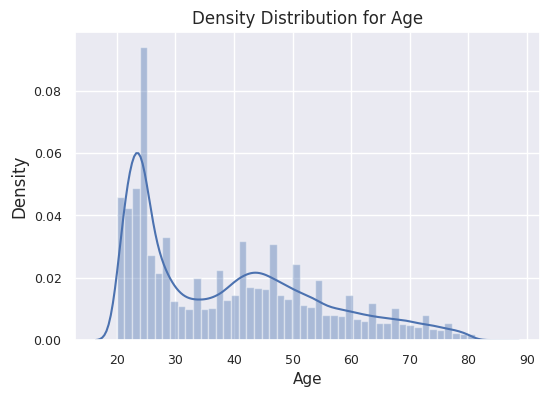

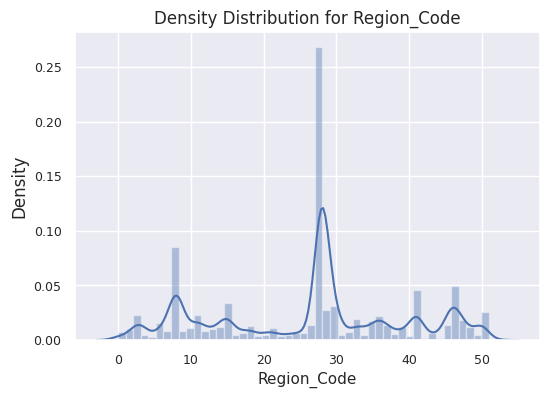

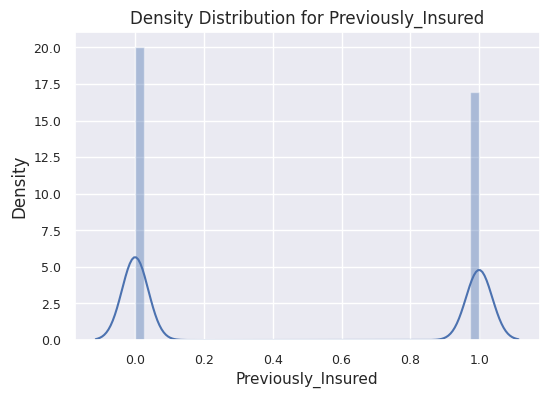

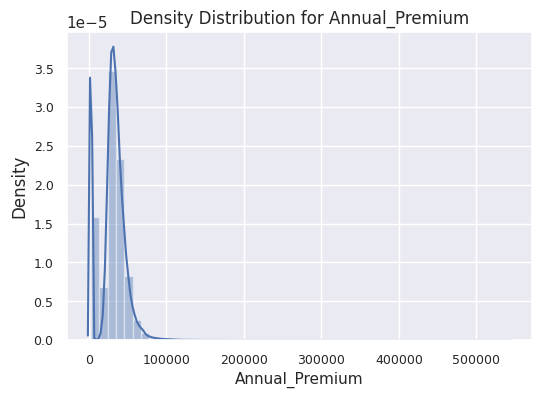

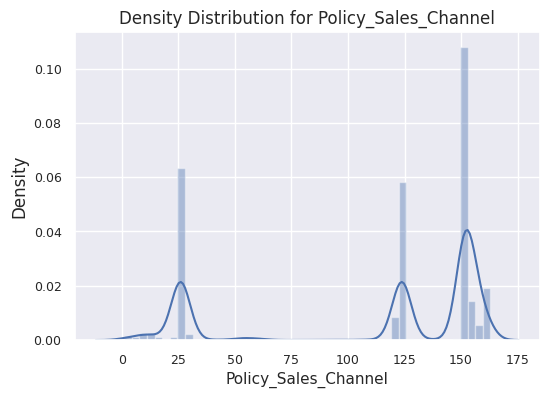

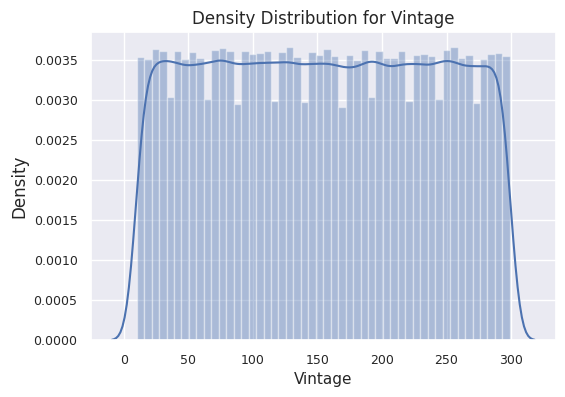

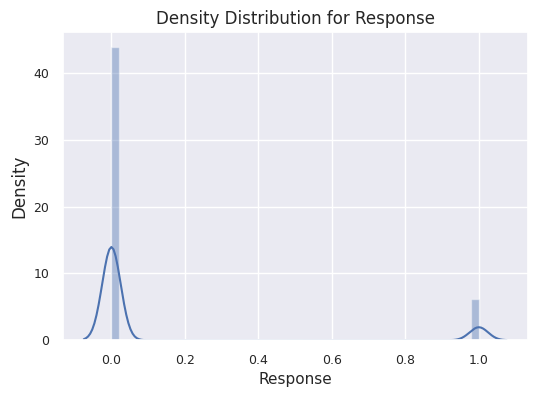

In [16]:
# Chart - 1 visualization code
features = ['Age','Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

# Visulization
sns.set_theme()
for feature in features:
    fig = plt.figure(figsize = (6,4))
    ax = fig.gca()
    sns.distplot(Insurance_df[feature])
    ax.set_title('Density Distribution for'+' '+ feature)
    ax.set_xlabel(feature,fontsize = 11)
    ax.tick_params(labelsize=9)
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plots plot a univariate distribution of data and are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).That's why, to find some insights about numerical columns,we have used a distribution plot.

##### 2. What is/are the insight(s) found from the chart?

* From the distribution plots of the features, it is clear that none of the variables follow a normal distribution.
* Features like 'Age' and 'Annual Premium' have positively skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights that we have found help us to determine the distribution of variables and based on those distribution we will try to formulate our problem like which transformation we need to apply, which scaling mathod will be used, and the choice of algorithm.

#### Chart - 2

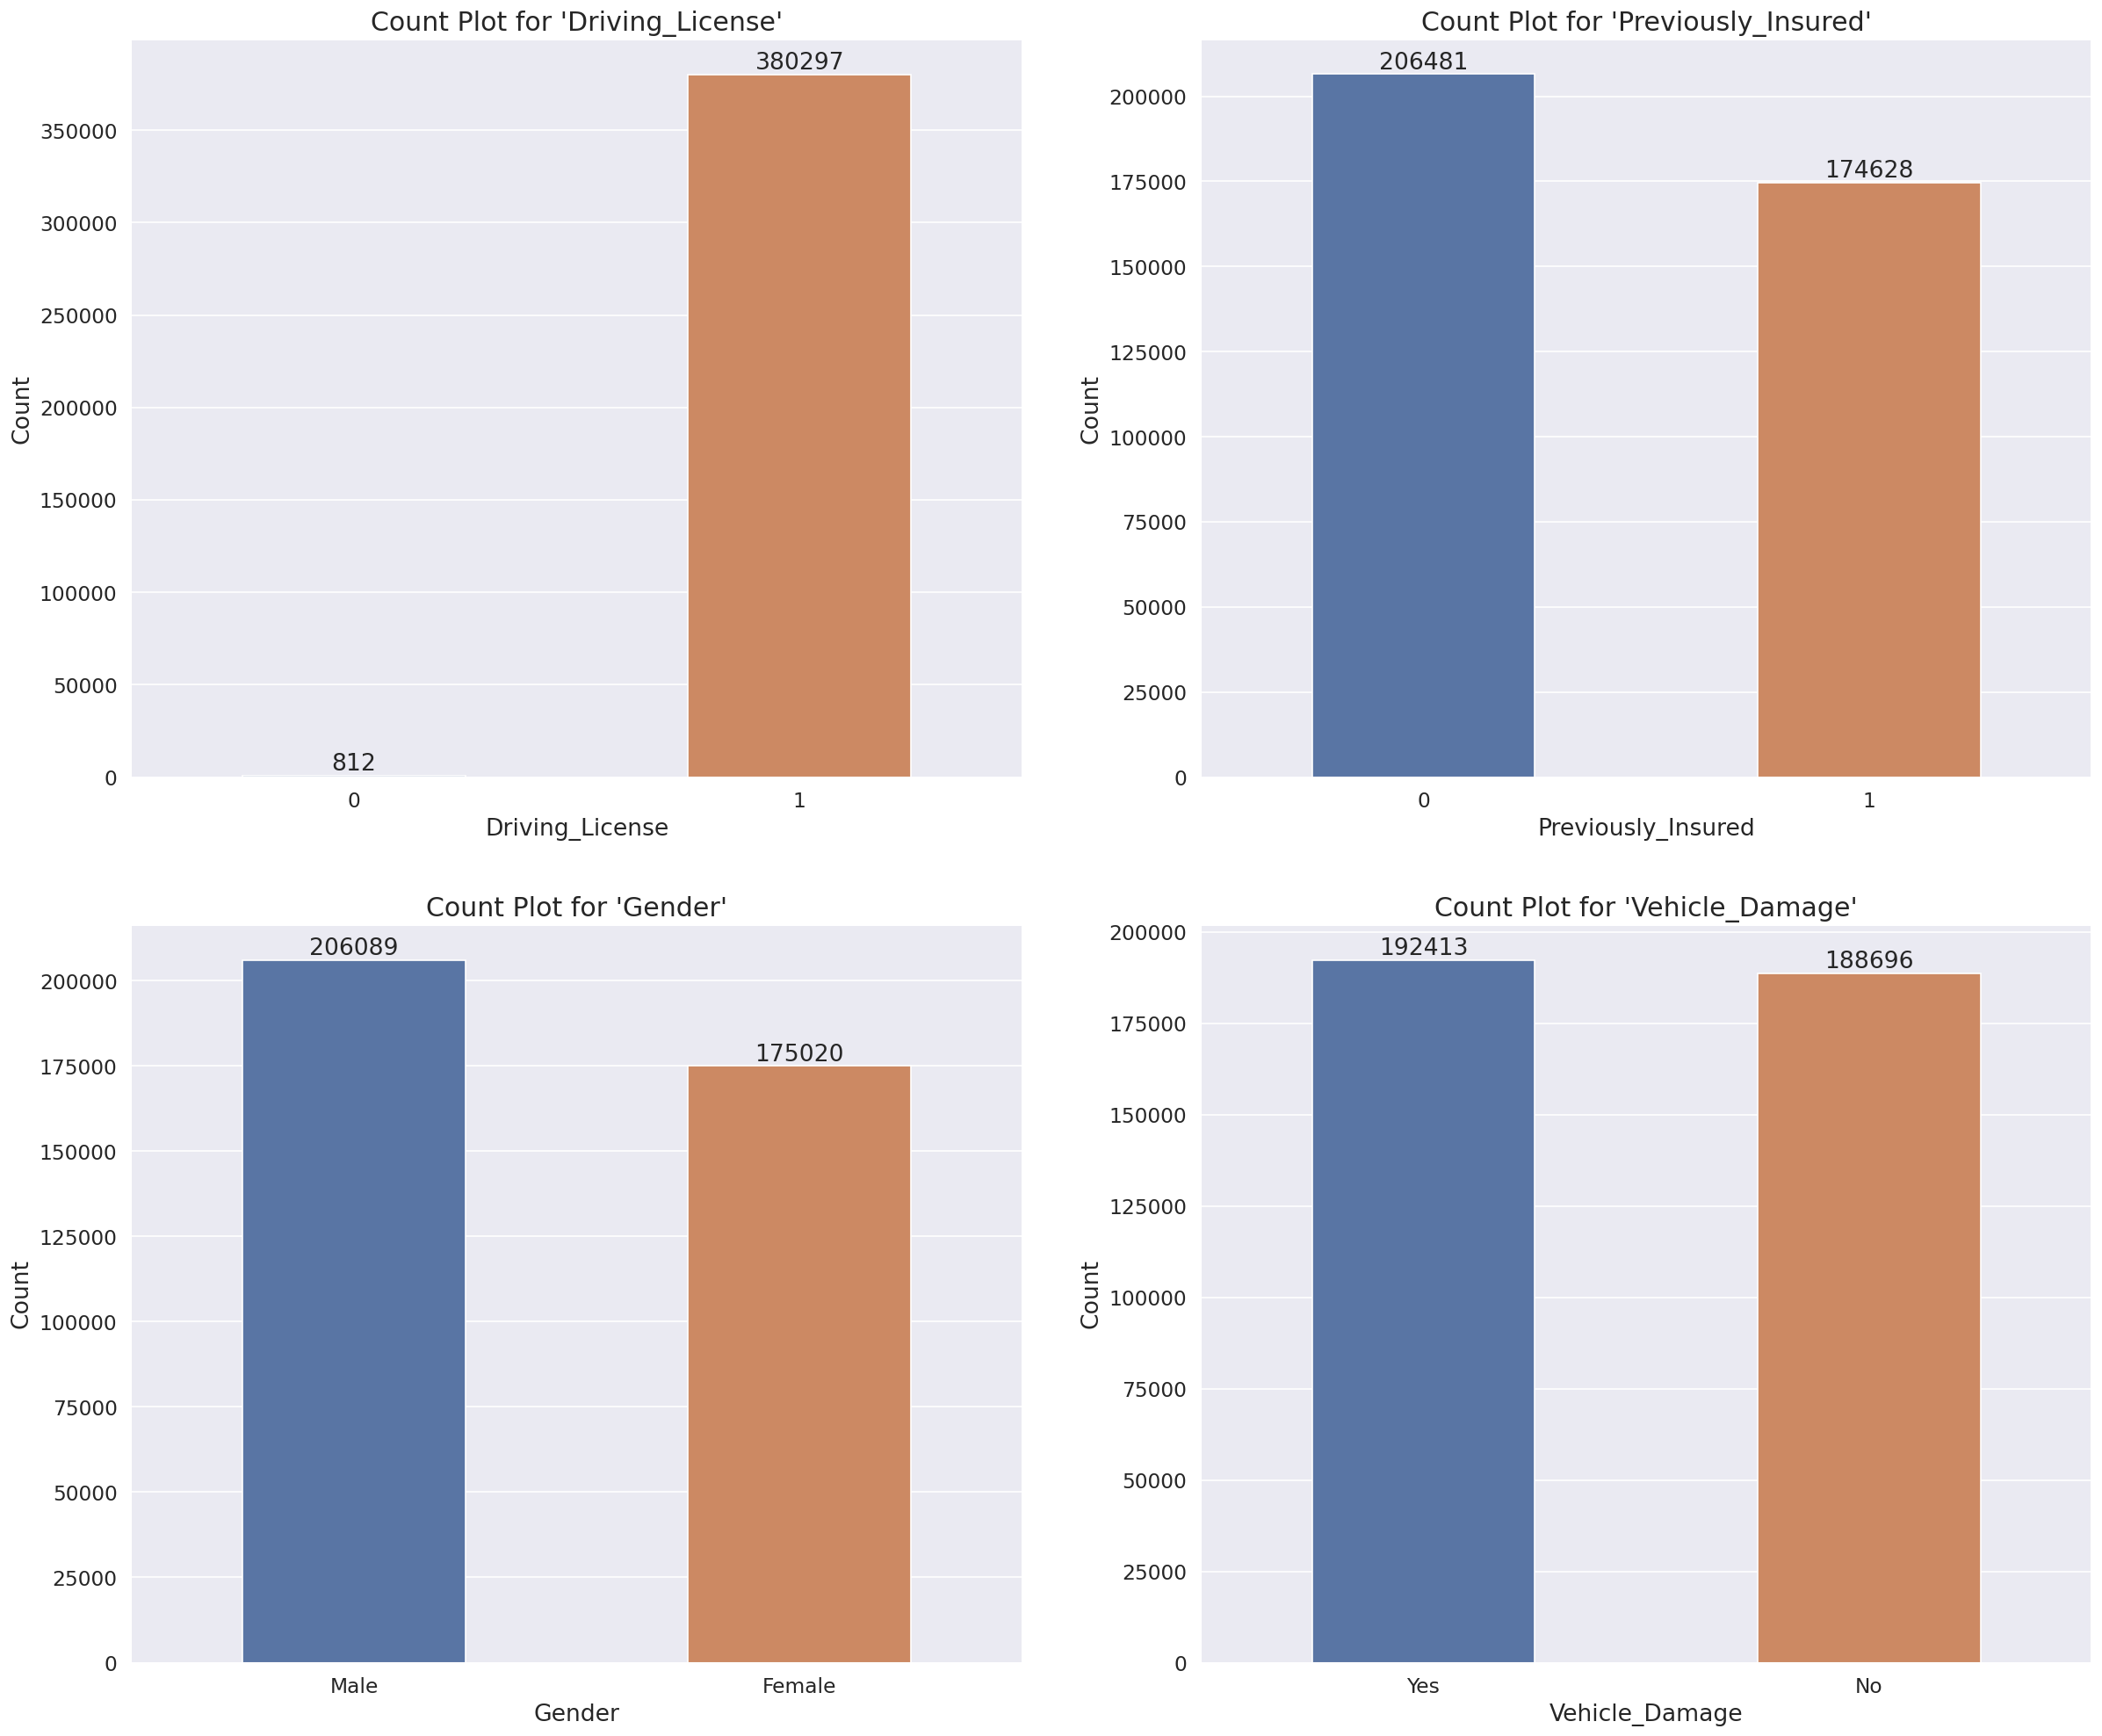

In [17]:
# Chart - 2 visualization code
features = ['Driving_License', 'Previously_Insured','Gender','Vehicle_Damage']
fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (24,20),dpi = 120)
for feature,axes in zip(features,axes.ravel()):
    sns.countplot(data = Insurance_df,x = feature,ax = axes,width = 0.5)
    axes.bar_label(axes.containers[0],fontsize = 16)
    axes.set_title("Count Plot for "+f"'{feature}'",fontsize = 18)
    axes.set_xlabel(feature,fontsize = 16)
    axes.set_ylabel('Count',fontsize = 16)
    axes.tick_params(labelsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Here, we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Almost all the customers have driving licences; only 812 people don't.
* There are more male customers than female customers.
* Approximately 1.7 million people already have vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in determining the count of each category for different variable, which will help in analysing the data more accurately.

#### Chart - 3

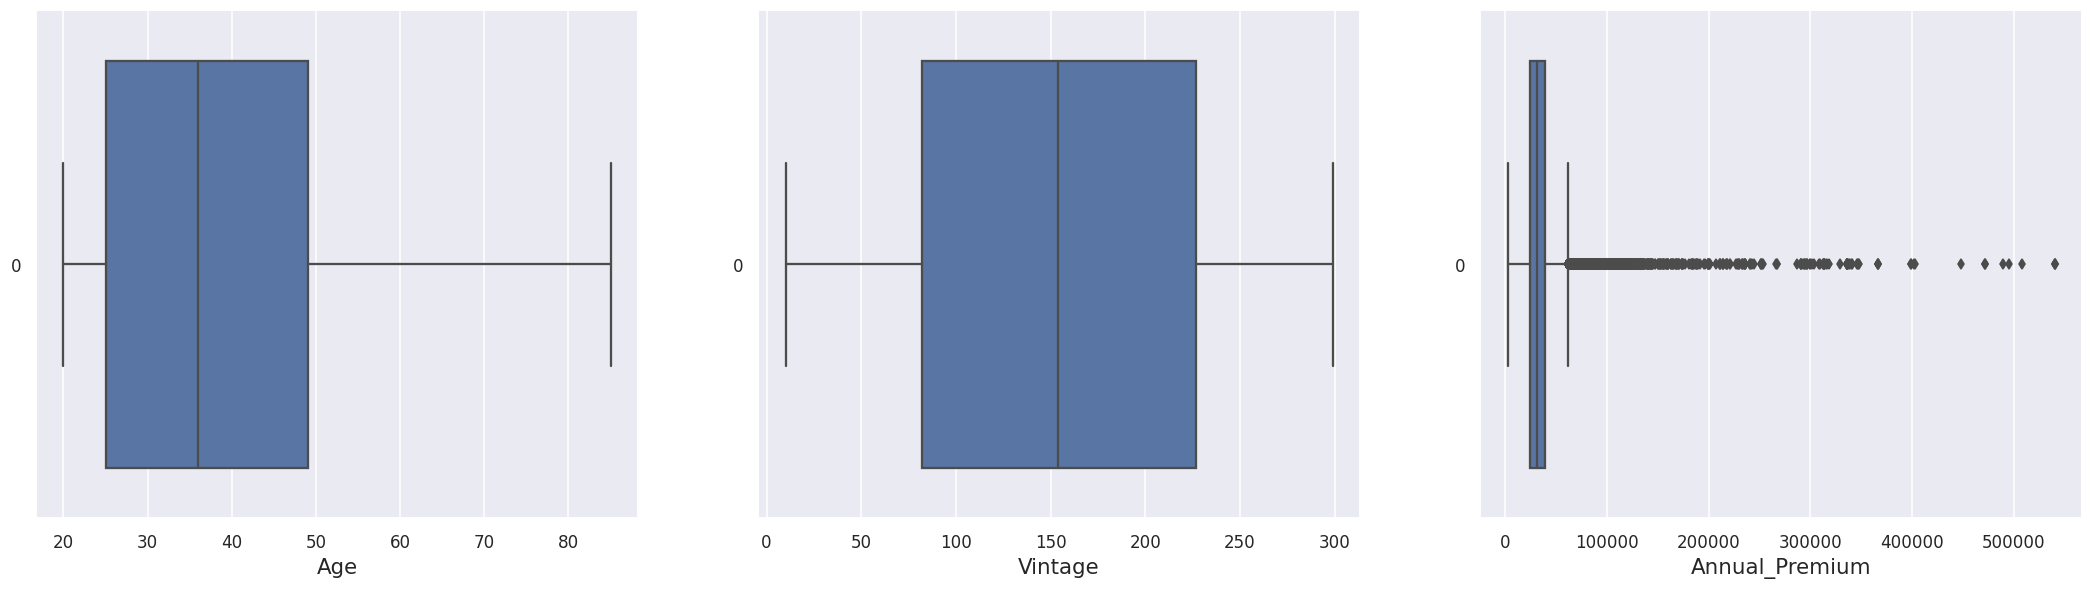

In [18]:
# Chart - 3 visualization code
features = ['Age','Vintage','Annual_Premium']
fig,axes = plt.subplots(nrows=1, ncols=3,figsize = (24,6),dpi = 110)
for feature,axes in zip(features,axes.ravel()):
    sns.boxplot(Insurance_df[feature],ax = axes,orient = 'h')
    axes.set_xlabel(feature,fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

A whisker plot also called a box plot , displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. Thus, for the visualisation of these five statistical measures of the variables,we used a box plot.

##### 2. What is/are the insight(s) found from the chart?

* Features 'Age' and 'Vintage' have no outliers.
* But, 'Annual_Premium' has a large number of outliers, which need to be treated for further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have found that variable 'Annual_Premium' has very large number of outliers and it is cruicial feature for our problem.We will handle these outliers during Feature engineering step but from the business point of view it important to understand the every aspect of problem, thats why gained insights have a positive impact on business.


#### Chart - 4

In [19]:
# Chart - 4 visualization code

Policy_Sales_Channel_df = Insurance_df['Policy_Sales_Channel'].value_counts().reset_index().rename(columns = {'index':'Policy_Sales_Channel','Policy_Sales_Channel':'Total_count'})
Policy_Sales_Channel_df

,Policy_Sales_Channel,Total_count
0,152,134784
1,26,79700
2,124,73995
3,160,21779
4,156,10661
...,...,...
150,149,1
151,43,1
152,144,1
153,143,1


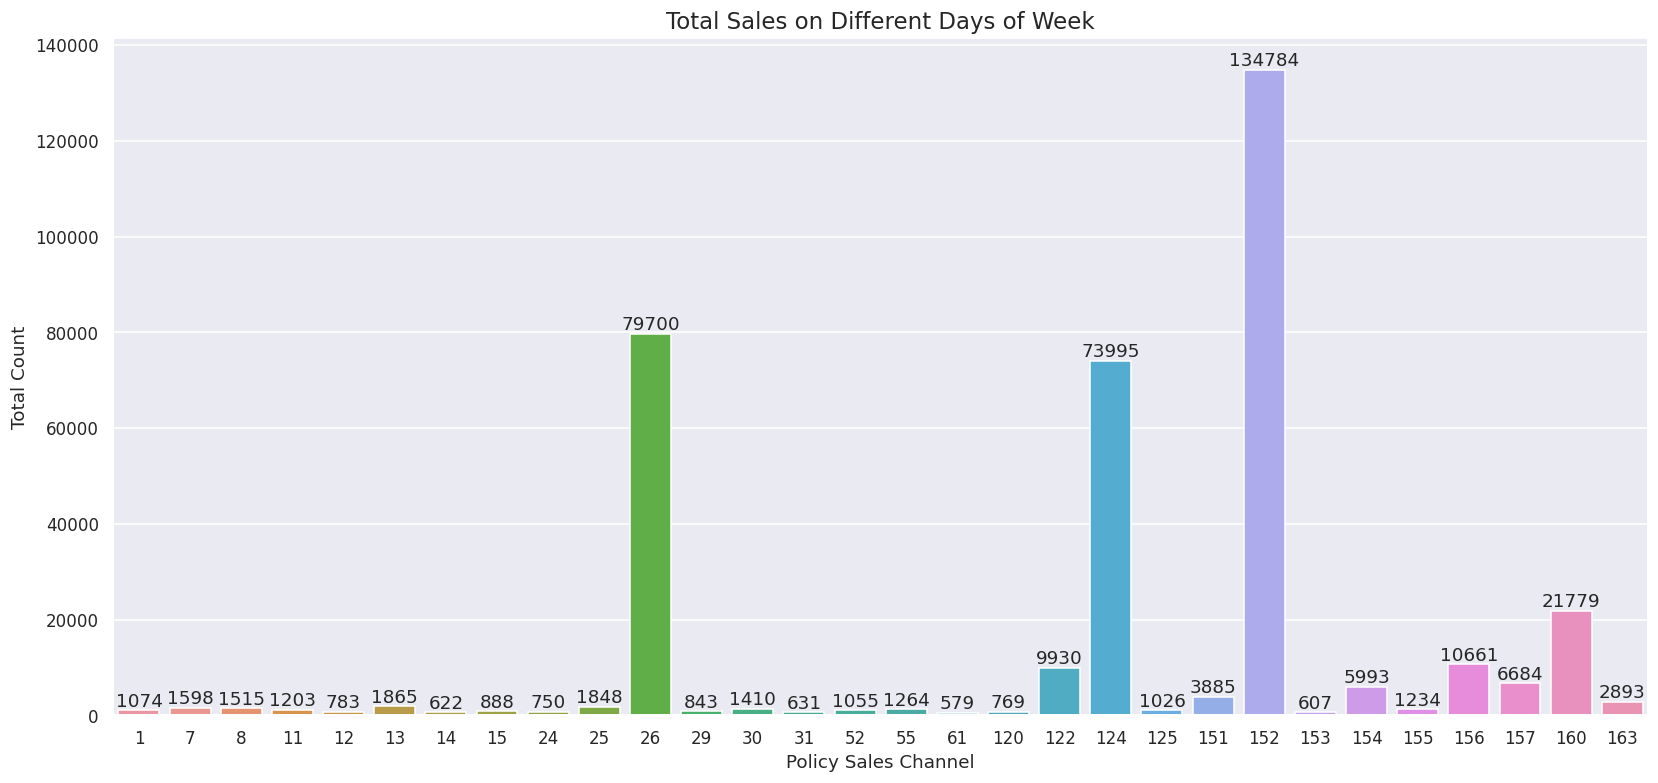

In [20]:
# visualization code
plt.figure(figsize = (18,8),dpi = 110)
plot = sns.barplot(data = Policy_Sales_Channel_df[:30],x = 'Policy_Sales_Channel',y = 'Total_count')
plt.bar_label(plot.containers[0], label_type='edge')
plt.title('Total Sales on Different Days of Week',fontsize = 15)
plt.ylabel('Total Count')
plt.xlabel('Policy Sales Channel')
plt.show()

##### 1. Why did you pick the specific chart?

Here, we used a bar chart because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Channel codes 152, 124, and 26 are the busiest channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights will be helpful in uniformly distributing the workload between policy sales channels so that it is easy to reach the customer as soon as possible without delaying service. This leads to customer satisfaction and improvement in customer service; hence, these insights create a positive business impact.

#### Chart - 5

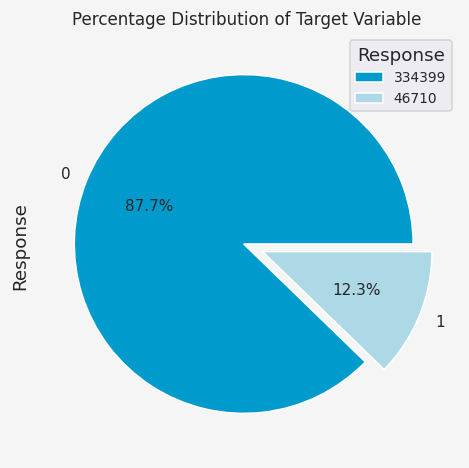

In [21]:
# Chart - 5 visualization code
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
plt.figure(figsize = (6,5),dpi = 110,facecolor = 'whitesmoke')
Insurance_df['Response'].value_counts().plot.pie(colors = color_palette_list,textprops = {'size': 'small'},autopct='%1.1f%%',explode = [0.02,0.1])
plt.legend(title='Response', fontsize='9',labels = Insurance_df['Response'].value_counts().values)
plt.title('Percentage Distribution of Target Variable',fontsize=11)
plt.show()

##### 1. Why did you pick the specific chart?

 we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.

##### 2. What is/are the insight(s) found from the chart?

* Approximately 88% of customers are not interested in taking Insurance.
* Only 12.3 % are interested in Vehicle Insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights we have found from the pie chart give information regarding the response of customers, like how many of them are interested in vehicle insurance or not,which will help the company plan a strategy for selling insurance in the near future.

#### Chart - 6

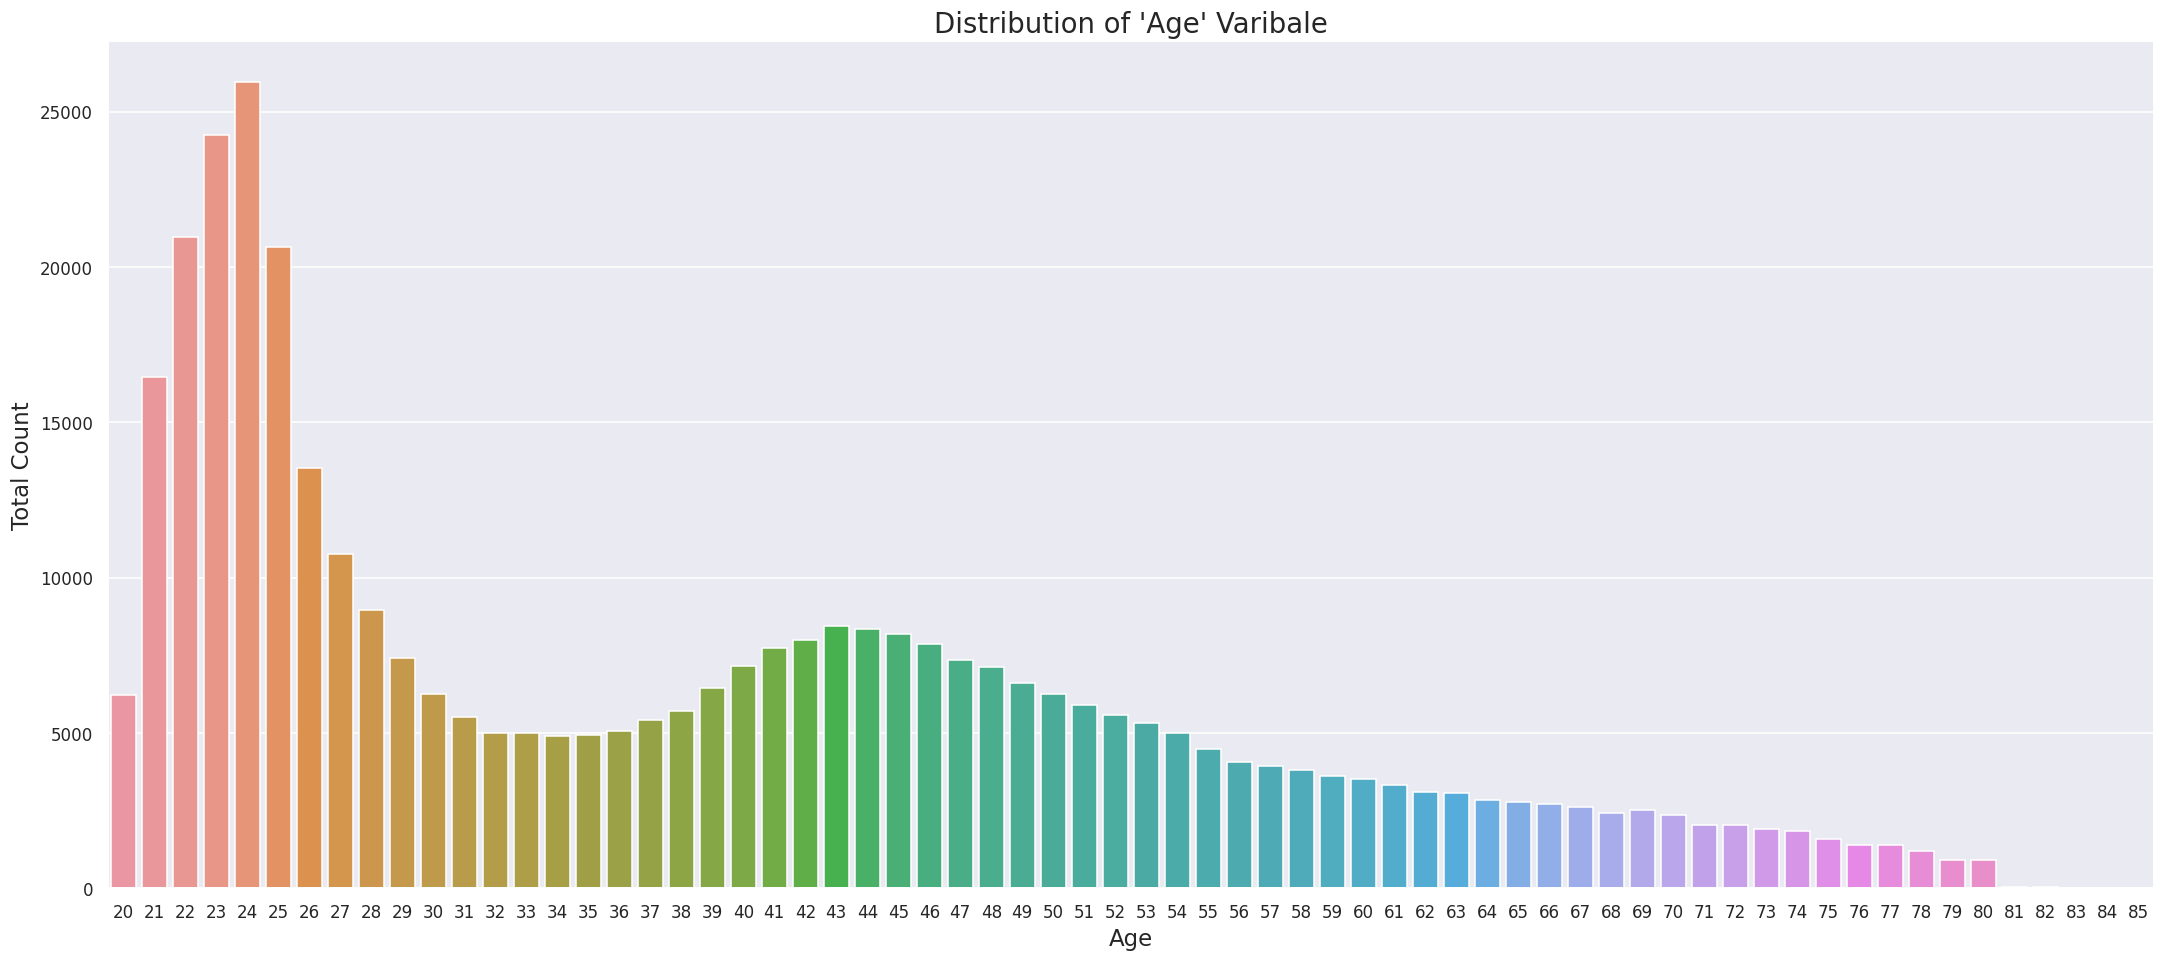

In [22]:
# Chart - 6 visualization code
plt.figure(figsize=(24,10),dpi = 110)
sns.countplot(data = Insurance_df,x = 'Age')
plt.title("Distribution of 'Age' Varibale",fontsize = 18)
plt.ylabel('Total Count',fontsize = 15)
plt.xlabel('Age',fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. That's why, to show the count of each category in a categorical variable, we used a count plot.

##### 2. What is/are the insight(s) found from the chart?

* Most of the customers are in the age group of 21–30 and 35–53.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the above count plot tell about the distribution of customers based on age and help the company target an audience based on the age of customers, which will lead the company towards positive growth.

## Bivariate and Multivariate Analysis

In [23]:
# Create a function to get Percentage Distributuion of feature and to get distribution of Response according to that feature

def plot_response_by_feature(df,feature1,feature2):
    # Figure parameters
    fig = plt.figure(figsize=(16, 6),dpi = 110)
    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    # Percentage distribution of feature
    sub1 = fig.add_subplot(1,2,1)
    df1 = df[feature1].value_counts().reset_index().rename(columns = {'index':f"{feature1}",f"{feature1}":'Total_count'})  # Dataframe for Value counts
    plot_labels = tuple(zip(df1[feature1],df1['Total_count']))
    color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
    sub1.pie(df1['Total_count'],labels=df1[feature1].values,colors = color_palette_list,textprops = {'size': 'small'},autopct='%1.1f%%')
    plt.legend(title = f"{feature1}",loc = 'upper right', fontsize='9',labels = plot_labels)
    plt.title("Percentage Dustribution of " + f"'{feature1}'",fontsize = 14)

    # Bar plot for response according to feature values
    sub2 = fig.add_subplot(1,2,2)
    axes = Insurance_df.groupby([feature1,feature2])[feature2].count().unstack().plot(kind = 'bar',ax = sub2)
    for container in axes.containers:
        axes.bar_label(container,fontsize = 11)
    plt.title("Response By " + f"'{feature1}'",fontsize = 14)
    plt.xlabel(f"{feature1}",fontsize = 13)
    plt.ylabel('Total Count',fontsize = 13)
    plt.xticks(rotation = 0)
    plt.show()

Here,we have created a function to get plots so that we will not have need to write same code again and again.

#### Chart - 7

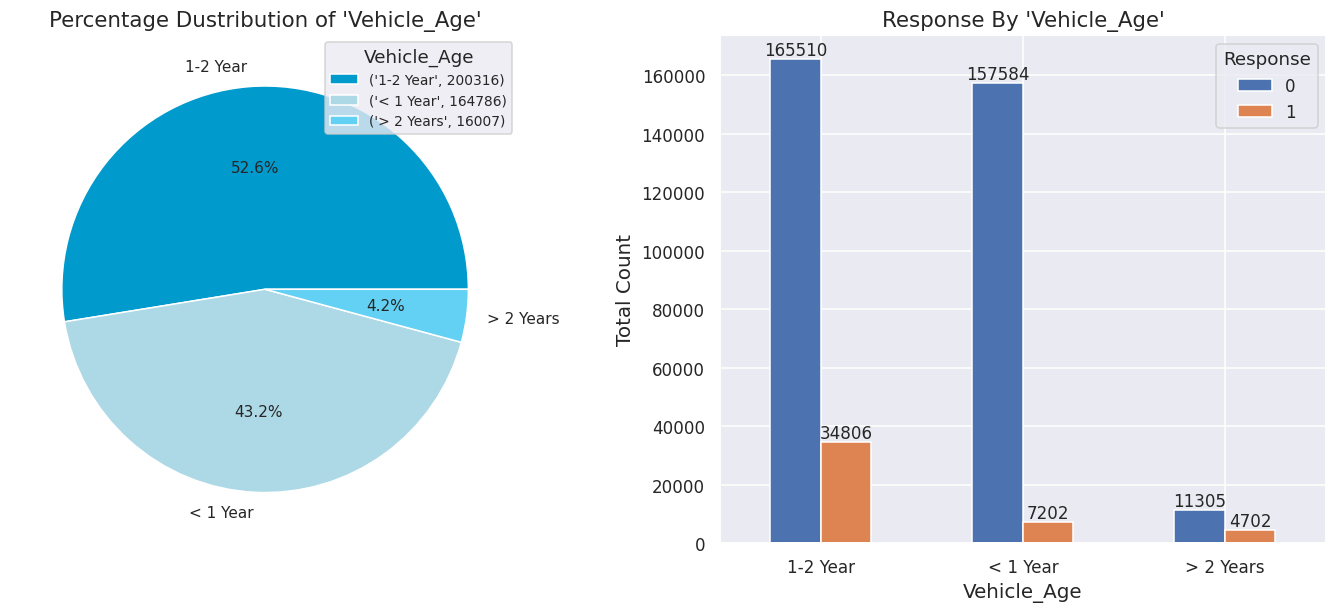

In [24]:
# Chart - 7 visualization code
plot_response_by_feature(Insurance_df,'Vehicle_Age','Response')

##### 1. Why did you pick the specific chart?

* we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.


* Secondly, we used a multiple bar chart for the visualisation of the 'Response' feature according to 'Vehicle_Age'. In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities.

##### 2. What is/are the insight(s) found from the chart?

* Approximately 57% of the vehicles have an age between 1 and 2 years, and 43% have an age less than 1 year.
* Only 4.2% of vehicles are older than 2 years.
* People who have a vehicle older than 2 years are more interested in insurance; out of 11305 people, 4702 are interested.
* People who have a vehicle which has an age of less than one year, are less interested in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A pie plot shows the distribution of vehicles according to age, and a bar plot shows the response of customers based on vehicle age. The above insights will be helpful in determining the customer's response regarding the insurance based on the age of their vehicle. This way, the company can target those customers first who have an older car and are interested in taking insurance, and this information will have a positive impact on business.

#### Chart - 8

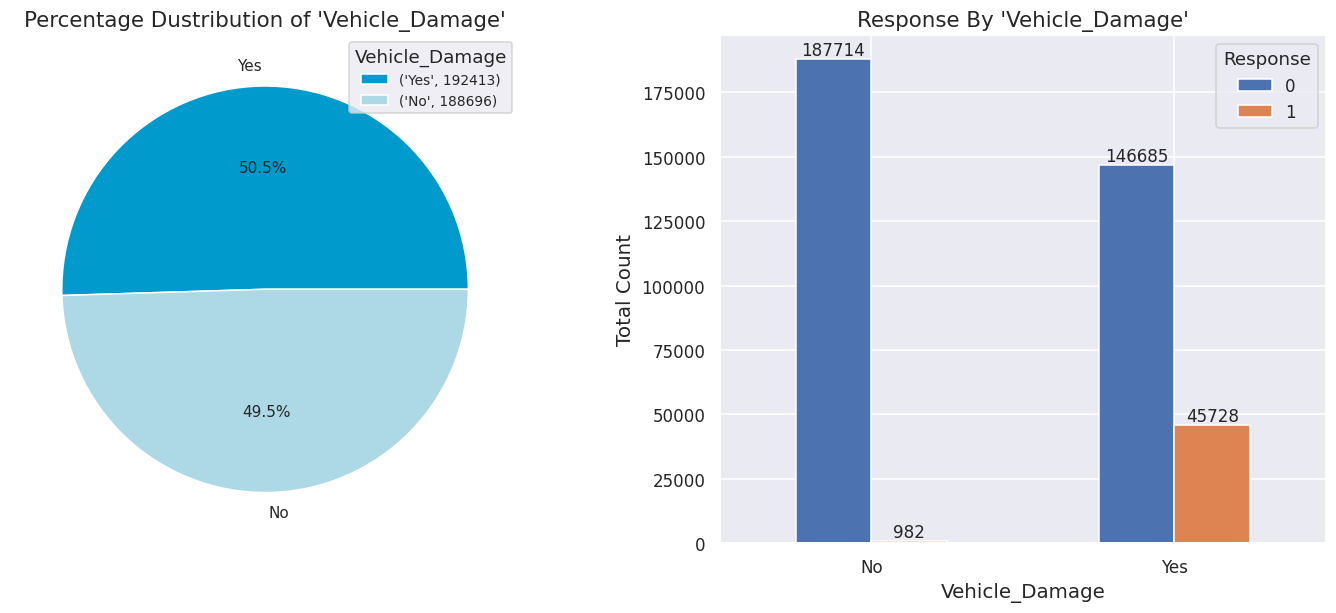

In [25]:
# Chart - 8 visualization code
plot_response_by_feature(Insurance_df,'Vehicle_Damage','Response')

##### 1. Why did you pick the specific chart?

* we used a pie chart because a pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used.


* Secondly, we used a multiple bar chart for the visualisation of the 'Response' feature. In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities.

##### 2. What is/are the insight(s) found from the chart?

* In our data, 50 percent of people have damaged vehicles.
* The interest in insurance is higher among those who have damaged vehicles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar plot shows the response of people based on 'Vehicle damage' and we have found that people who have damaged vehicles are more likely to be interested in vehicle insurance. This information will be helpful in determining the customer response regarding the insurance and will help the company set a target regarding insurance sales, which may lead to more profit.

#### Chart - 9

In [26]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [27]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [28]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [31]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [32]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [38]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [39]:
# Expand Contraction

#### 2. Lower Casing

In [40]:
# Lower Casing

#### 3. Removing Punctuations

In [41]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [43]:
# Remove Stopwords

In [44]:
# Remove White spaces

#### 6. Rephrase Text

In [45]:
# Rephrase Text

#### 7. Tokenization

In [46]:
# Tokenization

#### 8. Text Normalization

In [47]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [48]:
# POS Taging

#### 10. Text Vectorization

In [49]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [50]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [51]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [52]:
# Transform Your data

### 6. Data Scaling

In [53]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [54]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [56]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [57]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [62]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [65]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [66]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***